Saving world_bank_gdp.csv to world_bank_gdp.csv


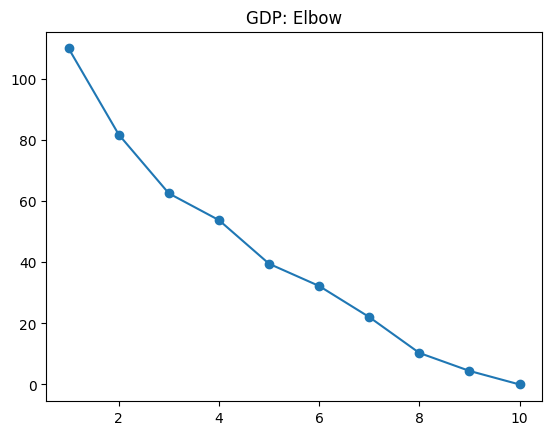

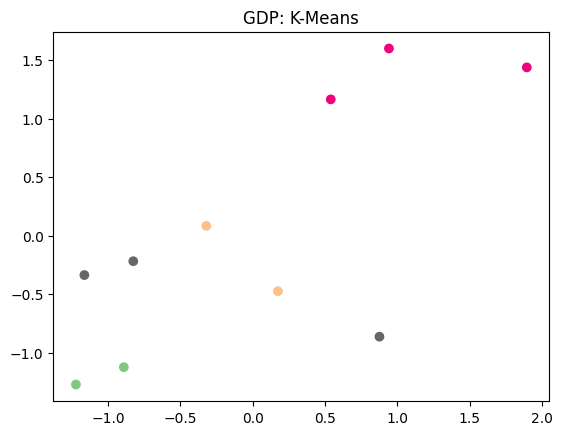

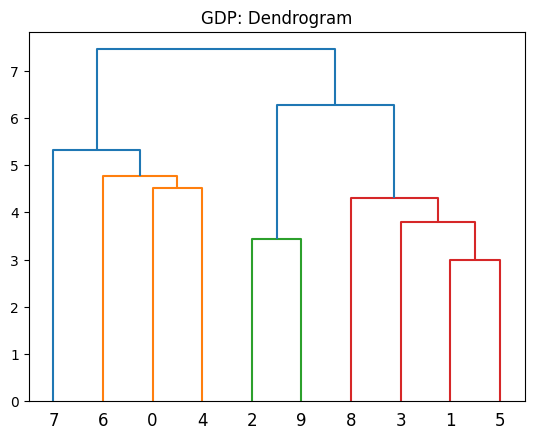

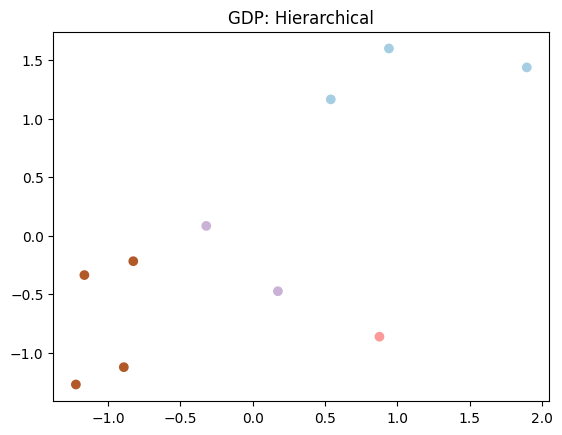

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from google.colab import files

files.upload()
df = pd.read_csv('world_bank_gdp.csv')
X = df.iloc[:, 1:].dropna(axis=1)
X_scaled = StandardScaler().fit_transform(X)
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('GDP: Elbow')
plt.show()
km = KMeans(n_clusters=4, random_state=42)
labels = km.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Accent')
plt.title('GDP: K-Means')
plt.show()
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('GDP: Dendrogram')
plt.show()
clusters = fcluster(Z, 4, criterion='maxclust')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Paired')
plt.title('GDP: Hierarchical')
plt.show()
